# Health Study - Part 1

The goals of this notebook are as follows:  
- **basic descriptive statistics**  
- **simple visualisations**  
- **a simulation related to how often a disease occurs**  
- **confidence intervals for systolic blood pressure**  
- **a hypothesis test: "Do smokers have higher mean blood pressure versus non-smokers?"**

In [1]:
import numpy as np
import pandas as pd

from src.health import HealthAnalysis
from src.viz import (hist_bp,
                     box_weight_by_sex,
                     bar_smoker_share,
                     scatter_bp_vs_age,
                     bar_mean_bp_smoker)
np.random.seed(42) # For reproducibility

In [2]:
analysis = HealthAnalysis()
df = analysis.df

df.head()

,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease,bmi
0,1,57,F,168.9,65.8,141.8,4.58,No,0,23.065698
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0,29.467653
2,3,59,F,169.9,82.2,151.7,6.16,No,0,28.476398
3,4,72,M,157.7,93.1,151.0,6.63,No,0,37.435729
4,5,46,M,192.6,104.1,144.1,5.21,No,0,28.063263


First we load the dataset through the "HealthAnalysis" class, which reads the csv file & converts columns to numeric/categorical types.  
We also compute BMI from height and weight for possible later analysis.

In [3]:
desc = analysis.descriptive()
desc

,mean,median,min,max
metric,,,,
age,49.426250,50.00,18.0,90.00
height,171.849250,171.35,144.4,200.40
weight,73.413000,73.20,33.7,114.40
systolic_bp,149.178625,149.40,106.8,185.90
cholesterol,4.929150,4.97,2.5,7.88


## Descriptive Stats

Basic Descriptive statistics (mean,median,min,max) for:  
- **age**  
- **height**  
- **weight**  
- **systolic blood pressure**  
- **cholesterol**

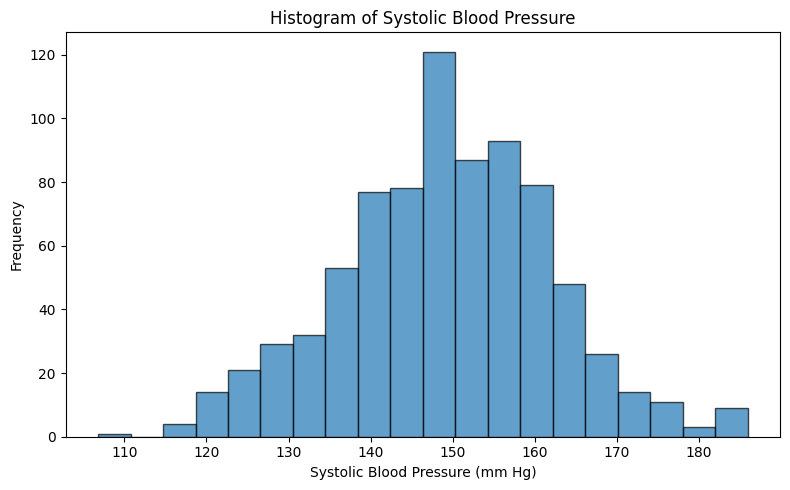

In [4]:
hist_bp(df)

## Histogram of Systolic Blood Pressure

The histogram graph shows how systolic blood pressure is distributed within the dataset.  
It looks roughly bellshaped & is centered around **149 mmHG**.  
Most participants fall in the interval of about **135-165 mmHG**, with only a few very low/very high values inbetween.

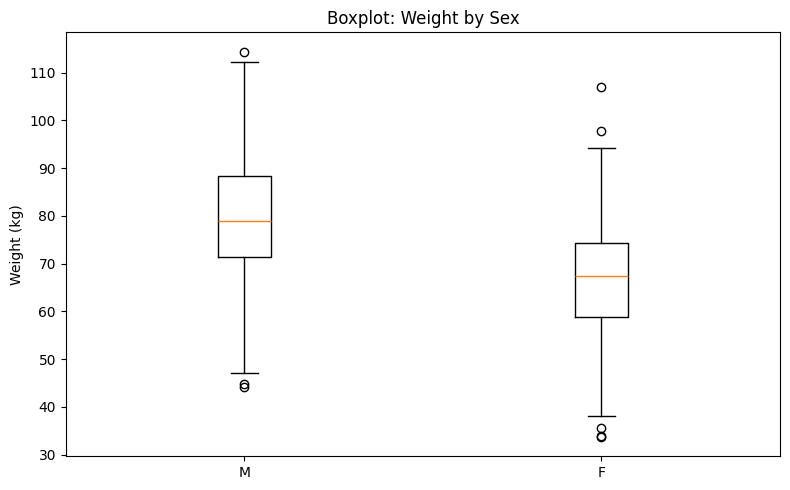

In [5]:
box_weight_by_sex(df)

## Weight by sex

The boxplot compares the weight distribution for men and women.  
- Men have a higher median weight and a sligherly larger spread.
- Women have a lower median weight and several outliers in the data.

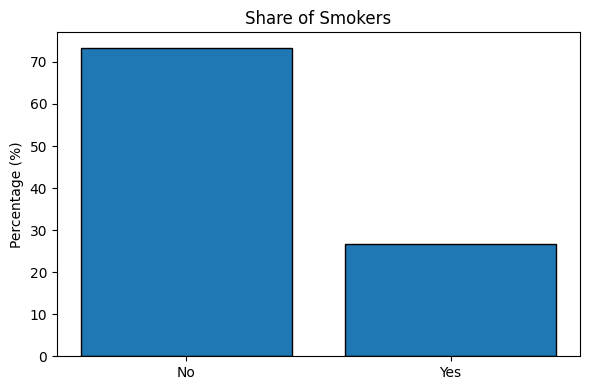

In [6]:
bar_smoker_share(df)

## Share of Smokers

This bar chart show the percentage of smokers and non-smokers from the dataset.  

- **25-30%** of participants are smokers.
- **70-75%** are non-smokers.

This means the majority are non-smokers, which we should keep in mind when I compare blood pressure between the two groups later.

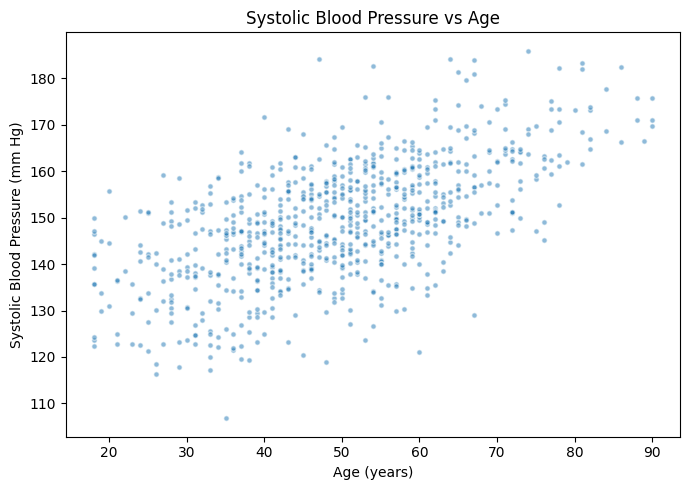

In [7]:
scatter_bp_vs_age(df)

## Systolic blood pressure vs age

A scatter plot that shows the relationship between age and blood pressure.

Theres a clear line between the older you get, the higher you blood pressure becomes.  
This patterns matches usual medical expectations and is useful context for the rest of the analysis.

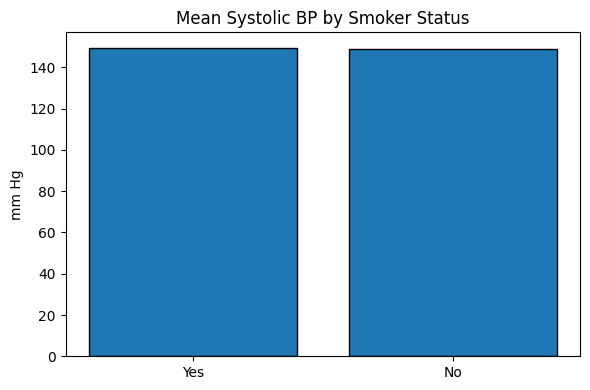

In [8]:
bar_mean_bp_smoker(df)

## Mean systolic blood pressure based on smoker status

This bar chart compares the **average** systolic blood pressure for smokers and non-smokers.

The two bars are almost identical. In the dataset given, the mean systolic blood pressure is about **149 mmHG** for both smokers and non-smokers.  
This suggests that there is no apparenty difference in average blood pressure between the two groups, which I will confirm with the hypothesis tests later.

In [9]:
p_real = analysis.disease_rate()
p_sim = analysis.simulate_disease(n=1000)

print(f"Disease share in data: {p_real * 100:.3f}%")
print(f"Disease share in simulation: {p_sim * 100:.3f}%")

Disease share in data: 5.875%
Disease share in simulation: 5.400%


## Disease rate and disease simulation

First, I calculate the amount of people with a disease in the given dataset.  
In this dataset the disease rate comes out to about 5.9%.  

Then I simulation 1000 "virtual" participants with the same probablitiy of disease using a binomial model.  
The simulated disease rate comes out very close to the observed dataset one, which makes sense because it is based on the same probablitiy (but it is not exactly the same due to random variation)

In [10]:
ci_norm = analysis.ci_bp_normal(alpha=0.05)
ci_t = analysis.ci_bp_t(alpha=0.05)
ci_boot = analysis.ci_bp_bootstrap(alpha=0.05, n_boot=5000)

ci_norm = tuple(float(x) for x in ci_norm)
ci_t = tuple(float(x) for x in ci_t)
ci_boot = tuple(float(x) for x in ci_boot)

print(f"95% CI using normal approximation:", tuple(round(x, 2) for x in ci_norm))
print(f"95% CI using t-distribution:", tuple(round(x, 2) for x in ci_t))
print(f"95% CI using bootstrap:", tuple(round(x, 2) for x in ci_boot))

95% CI using normal approximation: (148.29, 150.07)
95% CI using t-distribution: (148.29, 150.07)
95% CI using bootstrap: (148.3, 150.06)


## Confidence intervals for mean systolic blood pressure

Here I calculate 95% confidence intervals for the **mean** of "systolic_bp" using three different methods:  

- Normal approximation - Asssumes the sampling distribution of the mean is aprox normal.
- T-distribution - Similar to normal aproxximation, but takes into account the uncertainty in the estimated standard deviation.
- Bootstrap - A non-parametric method that does not assume a normal distribution. Resamling the dataset many times and calculates the mean for each sample.

All three methods produces almost identical intervals, which suggets the dataset is stable, large and that the distribution is not extremely skewed.

In [11]:
t_stat, p_two, p_boot = analysis.smoker_bp_ttests()

print(f"Welch t-test (two-sided): t = {t_stat:.2f}, p ≈ {p_two:.4f}")
print(f"Bootstrap test (one-sided, smoker > non-smoker): p ≈ {p_boot:.4f}")

Welch t-test (two-sided): t = 0.45, p ≈ 0.6527
Bootstrap test (one-sided, smoker > non-smoker): p ≈ 0.3262


## Hypothesis test: Do smokers have higher mean blood pressure?

To find out whether smokers have higher average systolic blood pressure compared to non-smokers, I used two statistical tests:  
- **Welch t-test** (two sided)
- **Bootstrap test** (one-sided)

Results:  
- t-test p-value ≈ 0.65
- bootstrap p-value ≈ 0.33

Both p-values are far above the common significance level of 0.05.  
This means there is no statistical evidence that smokers have higher blood pressure compared to non-smokers.  
This conclusion is fully consistent with the earilier bar plot that showed nearly identical average blood pressure in both groups.

## Method Discussion & Results

In part 1 of this project, I used several different statistical methods to get the expected results.

#### 1. Descriptive stats & visualisation graphs

Here I gathered all basic summary statistics (mean,median,min,max) to get a good idea of the range on all variables.  
I also created several graphs (histograms, boxplots, scatter plots) to make patterns in the data easier to observe, to identify potential outliers and wether assumptions such as "normality" seem reasonable.

#### 2. Confidence Intervals

I calculated 95% confidence intervals for the mean blood pressure using:
- **Normal Approximation**
- **t-distribution**
- **Bootstrap confidence interval**

All three methods produced nearly identical intervals.  
This indicates that the dataset is large, not extremely skewed and therefore making more normal-based methos appropriate and stable for this dataset.

#### 3. Hypothesis testing

In the final part, I used two different methods to compare smokers & non-smokers:
- **Welch t-test**
- **Bootstrap hypothesis test**

Both tests led to the same conclusion (no significant difference), which in return stengthens the reliability of the result.  
This suggets that in this dataset, smoking status **does not** have a measurable effect on blood pressure.

In [12]:
# I forgot to add power analysis in the original module, and ran out of time, so heres a quick simulation-based power analysis
def simulate_power(df, delta=5, n_sim=1000):
    rng = np.random.default_rng(42)
    count = 0
    base = df.copy()

    for _ in range(n_sim):
        sim = base.copy()

        mask = sim["smoker"].astype(str).str.lower() == 'yes'
        sim.loc[mask, "systolic_bp"] += delta

        analysis_sim = HealthAnalysis()
        analysis_sim.df = sim
        t, p_two, p_boot = analysis_sim.smoker_bp_ttests()

        if p_boot < 0.05:
            count += 1
    return count / n_sim

power = simulate_power(df, delta=5, n_sim=300)
power

1.0

## Power analysis

To understand how reliable the hypothesis test is, I simulate a scenario where smokers have 5 mmHG higher blood pressure than in the actual data.  
Running 300 simulations shows that the bootstrap test detected this difference every single time (power = 1.0).  
This means that if a true difference of about 5 mmHg existed in the given data, our test would almost always identify it.
